<a href="https://colab.research.google.com/github/Thenujan-Nagaratnam/Deep-Learning/blob/main/Obstacle_Prediction_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center>Starter Code for Obstacle Prediction</center></h2>

![](https://images.aicrowd.com/raw_images/challenges/banner_file/901/d5b56de544c949cb8bf7.jpg)

### What are we going to learn?

  - Using [scikit-learn](https://scikit-learn.org/stable/) [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  for binary classification.

Note: Create a copy of the notebook and use the copy for submission. Go to File > Save a Copy in Drive to create a new copy



# Downloading Dataset


Installing `aicrowd-cli`

In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/gxDJmAFd4C6Yb8rthNSLhtcLv-C_qYTvkQ-aDGIAxDs
API Key valid
Gitlab access token valid
Saved details successfully!


In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c obstacle-prediction -o data

ERROR:root:Error while reading the git config, 'NoneType' object has no attribute 'config_reader'


data.npz:   0%|          | 0.00/6.52M [00:00<?, ?B/s]

sample_submission.csv:   0%|          | 0.00/9.01k [00:00<?, ?B/s]

# Importing Libraries

In this baseline, we will be using the sklearn library to train the model and generate predictions.

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

Here, we will read the `data.npz` which contains both training samples & labels, and testing samples.

In [87]:
data = np.load("/content/data/data.npz", allow_pickle=True)

train_data = data["train"]
test_data = data['test']

train_data.shape, test_data.shape

((5000, 2), (3000,))

In [88]:
train_data

array([[array([[ 8.59265938e-08,  9.43149701e-02,  9.26128626e-02,
                 2.21422219e+00],
               [ 4.98870598e-08,  4.09966931e-02,  1.85818858e-02,
                 2.08142352e+00],
               [ 3.34119576e-08,  1.65841877e-01, -1.29256640e-02,
                 2.04282093e+00],
               ...,
               [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
                -1.00000000e+00],
               [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
                -1.00000000e+00],
               [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
                -1.00000000e+00]])                                , 1],
       [array([[-2.45858431,  0.15992118, -0.1475938 , 17.53632736],
               [-2.48255897, -0.03659383, -0.1692394 , 13.12974834],
               [-2.48762727, -0.03044151, -0.14287235, 19.3575058 ],
               ...,
               [-1.        , -1.        , -1.        , -1.        ],
               [-1.        , -1.        

In [89]:
# Convert each training to 1D array so can we can put that into a sklearn model
X = [sample.flatten() for sample in train_data[:, 0].tolist()]
y = train_data[:, 1].tolist()

In [90]:
X[:10]

[array([ 8.59265938e-08,  9.43149701e-02,  9.26128626e-02, ...,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]),
 array([-2.45858431,  0.15992118, -0.1475938 , ..., -1.        ,
        -1.        , -1.        ]),
 array([ 2.35824633,  0.0696648 , -0.00616779, ..., -1.        ,
        -1.        , -1.        ]),
 array([-2.48451281,  0.02563663, -0.16195148, ..., -1.        ,
        -1.        , -1.        ]),
 array([-2.33315945, -0.28062323, -0.03033316, ..., -1.        ,
        -1.        , -1.        ]),
 array([-2.51307225,  0.0277686 , -0.15384947, ..., -1.        ,
        -1.        , -1.        ]),
 array([-2.47194743,  0.11521686, -0.14387229, ..., -1.        ,
        -1.        , -1.        ]),
 array([-1.96639669, -0.02595553, -0.15269533, ..., -1.        ,
        -1.        , -1.        ]),
 array([-0.96545535, -0.11918614, -0.13950896, ..., -1.        ,
        -1.        , -1.        ]),
 array([-1.24770451, -0.06835437, -0.14558072, ..., -1.        ,
  

<Axes: ylabel='count'>

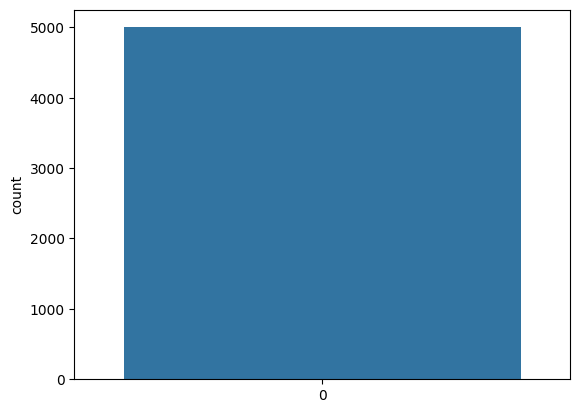

In [91]:
# Checking for any class imbalance
sns.countplot(y)

## Splitting the data

In [92]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(np.array(X)).type(torch.float)
y = torch.from_numpy(np.array(y)).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 8.5927e-08,  9.4315e-02,  9.2613e-02,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [-2.4586e+00,  1.5992e-01, -1.4759e-01,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 2.3582e+00,  6.9665e-02, -6.1678e-03,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [-2.4845e+00,  2.5637e-02, -1.6195e-01,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [-2.3332e+00, -2.8062e-01, -3.0333e-02,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00]]),
 tensor([1., 0., 1., 0., 0.]))

In [93]:
# Splitting the training set, and training & validation
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [94]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [95]:
X_train.shape, y_train.shape

(torch.Size([4000, 1200]), torch.Size([4000]))

In [96]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [97]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=1200, out_features=20),
            nn.ReLU(),
            nn.Linear(in_features=20, out_features=1),
            nn.ReLU()
        )
         # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer(x)

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer): Sequential(
    (0): Linear(in_features=1200, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=1, bias=True)
    (3): ReLU()
  )
)


In [98]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [99]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.85590, Accuracy: 23.97% | Test Loss: 0.69280, Test Accuracy: 69.40%
Epoch: 100 | Loss: 0.50454, Accuracy: 97.92% | Test Loss: 0.49937, Test Accuracy: 97.90%
Epoch: 200 | Loss: 0.50049, Accuracy: 98.08% | Test Loss: 0.49673, Test Accuracy: 97.90%
Epoch: 300 | Loss: 0.49868, Accuracy: 98.38% | Test Loss: 0.49606, Test Accuracy: 97.50%
Epoch: 400 | Loss: 0.49886, Accuracy: 98.70% | Test Loss: 0.49739, Test Accuracy: 97.40%
Epoch: 500 | Loss: 0.49832, Accuracy: 98.78% | Test Loss: 0.49802, Test Accuracy: 97.50%
Epoch: 600 | Loss: 0.49880, Accuracy: 98.75% | Test Loss: 0.49736, Test Accuracy: 97.30%
Epoch: 700 | Loss: 0.49625, Accuracy: 98.60% | Test Loss: 0.49748, Test Accuracy: 97.50%
Epoch: 800 | Loss: 0.49583, Accuracy: 98.78% | Test Loss: 0.49953, Test Accuracy: 97.30%
Epoch: 900 | Loss: 0.49690, Accuracy: 98.88% | Test Loss: 0.49998, Test Accuracy: 97.30%


Epoch: 0 | Loss: 0.69906, Accuracy: 37.82% | Test Loss: 0.54386, Test Accuracy: 92.10%
Epoch: 100 | Loss: 0.06871, Accuracy: 98.00% | Test Loss: 0.07143, Test Accuracy: 98.20%
Epoch: 200 | Loss: 0.05880, Accuracy: 98.30% | Test Loss: 0.06125, Test Accuracy: 98.40%
Epoch: 300 | Loss: 0.05624, Accuracy: 98.42% | Test Loss: 0.06155, Test Accuracy: 98.40%
Epoch: 400 | Loss: 0.05417, Accuracy: 98.38% | Test Loss: 0.06516, Test Accuracy: 98.30%
Epoch: 500 | Loss: 0.04623, Accuracy: 98.80% | Test Loss: 0.05435, Test Accuracy: 98.30%
Epoch: 600 | Loss: 0.04490, Accuracy: 98.85% | Test Loss: 0.05454, Test Accuracy: 98.40%
Epoch: 700 | Loss: 0.04241, Accuracy: 98.88% | Test Loss: 0.05495, Test Accuracy: 98.40%
Epoch: 800 | Loss: 0.04044, Accuracy: 98.92% | Test Loss: 0.05531, Test Accuracy: 98.30%
Epoch: 900 | Loss: 0.04074, Accuracy: 98.95% | Test Loss: 0.05594, Test Accuracy: 98.40%

In [100]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:20], y_test[:20] # want preds in same format as truth labels

(tensor([1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
         0., 1.]),
 tensor([1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
         0., 1.]))

In [101]:
pip install torchmetrics

# Training the Model

In [102]:
import torchmetrics

confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=3)
confmat(y_preds, y_test)


tensor([[681,   8,   0],
        [ 17, 294,   0],
        [  0,   0,   0]])

# Validation

In [103]:
# Converting each testing sample into 1D array
test_1 = [sample.flatten() for sample in test_data.tolist()]
test = torch.from_numpy(np.array(test_1)).type(torch.float)

# Predictions

In [104]:
test[:10]

tensor([[-6.9085e+00,  5.4345e-02, -1.6204e-01,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00],
        [ 3.0706e-01, -1.2990e-01,  6.4298e-03,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00],
        [-2.4871e+00, -3.4778e-02, -1.4198e-01,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00],
        ...,
        [ 1.8311e+00,  2.2106e-01, -7.8359e-02,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00],
        [-8.5355e-01,  7.1846e-03, -1.5714e-01,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00],
        [ 1.6861e+00,  7.1846e-03, -3.2371e-02,  ..., -1.0000e+00,
         -1.0000e+00, -1.0000e+00]])

In [105]:
model_3.eval()
with torch.inference_mode():
    y_preds_sub = torch.round(torch.sigmoid(model_3(test))).squeeze()
y_preds[:10] # want preds in same format as truth labels

tensor([1., 0., 1., 1., 1., 0., 0., 0., 1., 0.])

In [106]:
# Converting the predictions array into pandas dataset
submission = pd.DataFrame({"label":y_preds_sub})
submission

,label
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
2995,0.0
2996,1.0
2997,0.0
2998,0.0


In [107]:
# Saving the pandas dataframe
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"), index=False)

# Submitting our Predictions
**Note : Please save the notebook before submitting it (Ctrl + S)**

In [108]:
%aicrowd notebook submit -c obstacle-prediction -a assets --no-verify

An unexpected error occured!
cannot import name 'appengine' from 'urllib3.contrib' (/usr/local/lib/python3.10/dist-packages/urllib3/contrib/__init__.py)
To get more information, you can run this command with -v.
To increase level of verbosity, you can go upto -vvvvv
